<a href="https://colab.research.google.com/github/prximenes/neural-networks-if702/blob/main/MiniProjeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      Centro de Informática - UFPE

                  Miniprojeto 2 de Redes Neurais - iF702
                                  03/2021
```
                  Alunos: ADRIANO NASCIMENTO DE SANTANA
                  BELARMINO GORLACH LIRA
                  JOÃO VITOR DA SILVA GOMES
                  PEDRO RAFAEL XIMENES DO CARMO

                  Professor: Germano Vasconcelos

```




In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

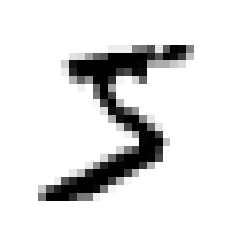

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([5, 0, 4, ..., 0, 4, 0], dtype=uint8)

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

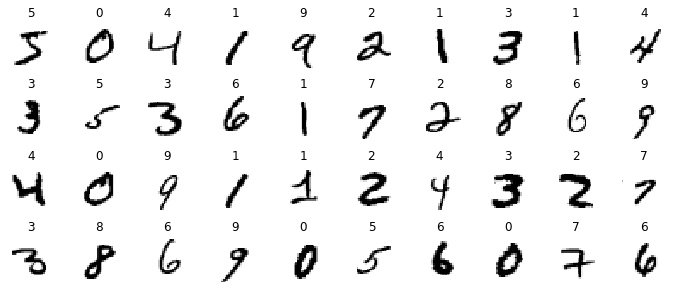

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Criação dos Modelos

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.vis_utils import plot_model
from IPython.display import display, Image
import matplotlib.image as mpimg


def conv_classifier(params):
  #Carregando o dataset de treino e o dataset de teste
  #Normalizando os dados e criando conjunto de validação
  (X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
  X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
  y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

  X_mean = X_train.mean(axis=0, keepdims=True)
  X_std = X_train.std(axis=0, keepdims=True) + 1e-7
  X_train = (X_train - X_mean) / X_std
  X_valid = (X_valid - X_mean) / X_std
  X_test = (X_test - X_mean) / X_std

  X_train = X_train[..., np.newaxis]
  X_valid = X_valid[..., np.newaxis]
  X_test = X_test[..., np.newaxis]

  #CRIANDO A REDE CONV

  if params['conv_layers'] == 2:
    model = keras.models.Sequential()
    model.add(Conv2D(params['filters1'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding'], input_shape=(28, 28,1)))
    model.add(Conv2D(params['filters2'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

  if params['conv_layers'] == 4:
    model = keras.models.Sequential()
    model.add(Conv2D(params['filters1'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding'], input_shape=(28, 28,1)))
    model.add(Conv2D(params['filters2'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(params['filters3'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(Conv2D(params['filters4'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

  if params['conv_layers'] == 6:
    model = keras.models.Sequential()
    model.add(Conv2D(params['filters1'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding'], input_shape=(28, 28,1)))
    model.add(Conv2D(params['filters2'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(params['filters3'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(Conv2D(params['filters4'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(params['filters5'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(Conv2D(params['filters6'], kernel_size=params['kernel_size'], strides=params['strd'], activation='relu', padding=params['padding']))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


  print(model.summary())
  plot_model(model, to_file="mnist_model.png", show_shapes=True, show_layer_names=True)
  display(Image(filename='mnist_model.png'))


  #
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])
 
  # reduz o parâmetro de learning rate se não houver 
  # melhoras em determinado número de epocas
  # útil para encontrar o mínimo global.
  learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                              patience=3, 
                                              verbose=1, 
                                              factor=0.5, 
                                              min_lr=0.00001)
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)

  #Treinando a Rede Neural definida utilizando 100 épocas
  history = model.fit(X_train, y_train, epochs=params['epochs'], validation_data=(X_valid, y_valid),
                      callbacks=[learning_rate_reduction, early_stopping], verbose=1, shuffle=False)

  #Plotando o histórico do treino
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

  #Avaliando o modelo para o conjunto de teste
  model.evaluate(X_test, y_test)

  y_pred = np.argmax(model.predict(X_test), axis=-1)
  y_true = y_test

  #Matriz de Confusão, acurácia do modelo
  print(classification_report(y_true, y_pred))  

  cnf_matrix = confusion_matrix(y_true, y_pred)

  df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')

# Experimentos

Experimento 0:

kernel: 3x3<br>
conv_layer1: filters=32<br>
conv_layer2: filters=32<br>
pooling_layer: poolsize=2<br>
dense_layer1: neurons=128<br>
out_layer: neurons=10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

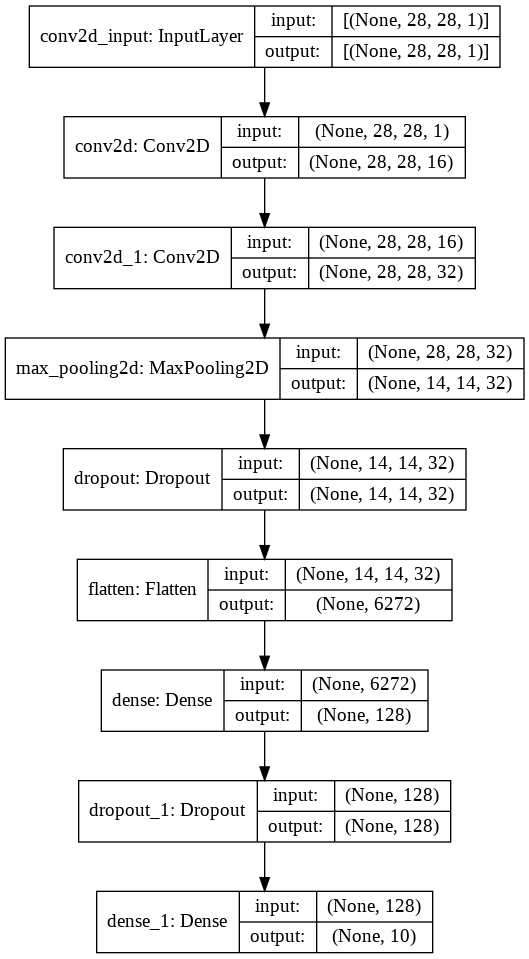

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4360 - accuracy: 0.8674 - val_loss: 0.0556 - val_accuracy: 0.9852
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9702 - val_loss: 0.0534 - val_accuracy: 0.9854
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0757 - accuracy: 0.9776 - val_loss: 0.0435 - val_accuracy: 0.9882
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0434 - val_accuracy: 0.9902
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0454 - val_accuracy: 0.9896
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0372 - val_accuracy: 0.9910
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0472 - val_accuracy:

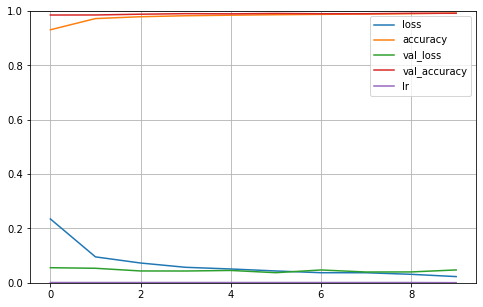

313/313 [==============================] - 1s 2ms/step - loss: 1376.9980 - accuracy: 0.9910
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



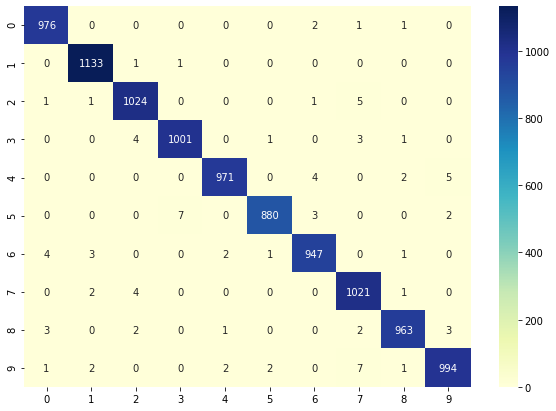

In [ ]:
params = {
  "conv_layers": 2,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "same",
  "filters1": 16,
  "filters2": 32
}

conv_classifier(params)

Experimento 1: 

kernel: 3x3<br>
conv_layer1: filters=32<br>
conv_layer2: filters=64<br>
pooling_layer: poolsize=2<br>
dense_layer1: neurons=128<br>
out_layer: neurons=10

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

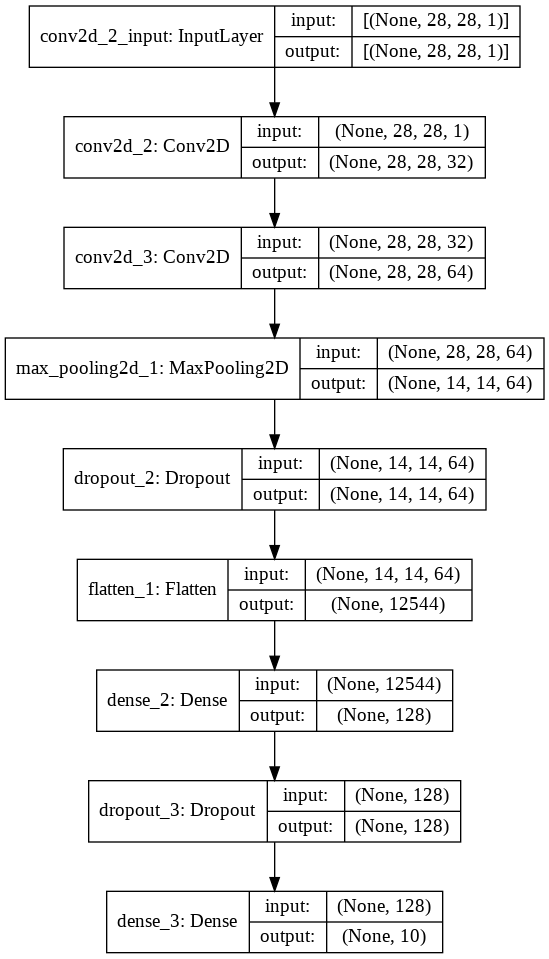

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3654 - accuracy: 0.8913 - val_loss: 0.0474 - val_accuracy: 0.9854
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0938 - accuracy: 0.9729 - val_loss: 0.0383 - val_accuracy: 0.9896
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0661 - accuracy: 0.9807 - val_loss: 0.0375 - val_accuracy: 0.9910
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0341 - val_accuracy: 0.9914
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0392 - val_accuracy:

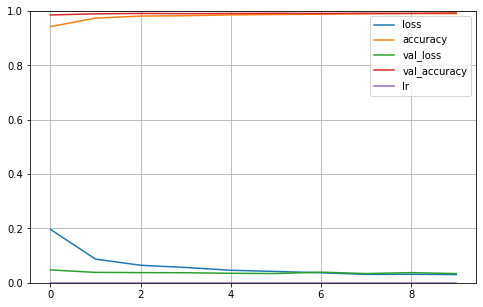

313/313 [==============================] - 1s 2ms/step - loss: 614.5470 - accuracy: 0.9909
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



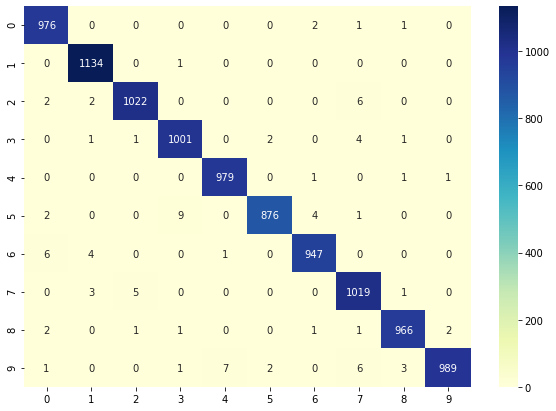

In [ ]:
params = {
  "conv_layers": 2,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "same",
  "filters1": 32,
  "filters2": 64
}

conv_classifier(params)

Experimento 2: 

kernel: 3x3<br>
conv_layer1: filters=16<br>
conv_layer2: filters=32<br>
pooling_layer: poolsize=2<br>
conv_layer3: filters=64<br>
conv_layer4: filters=64<br>
dense_layer1: neurons=128<br>
dense_layer2: neurons=64<br>
out_layer: neurons=10

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)         

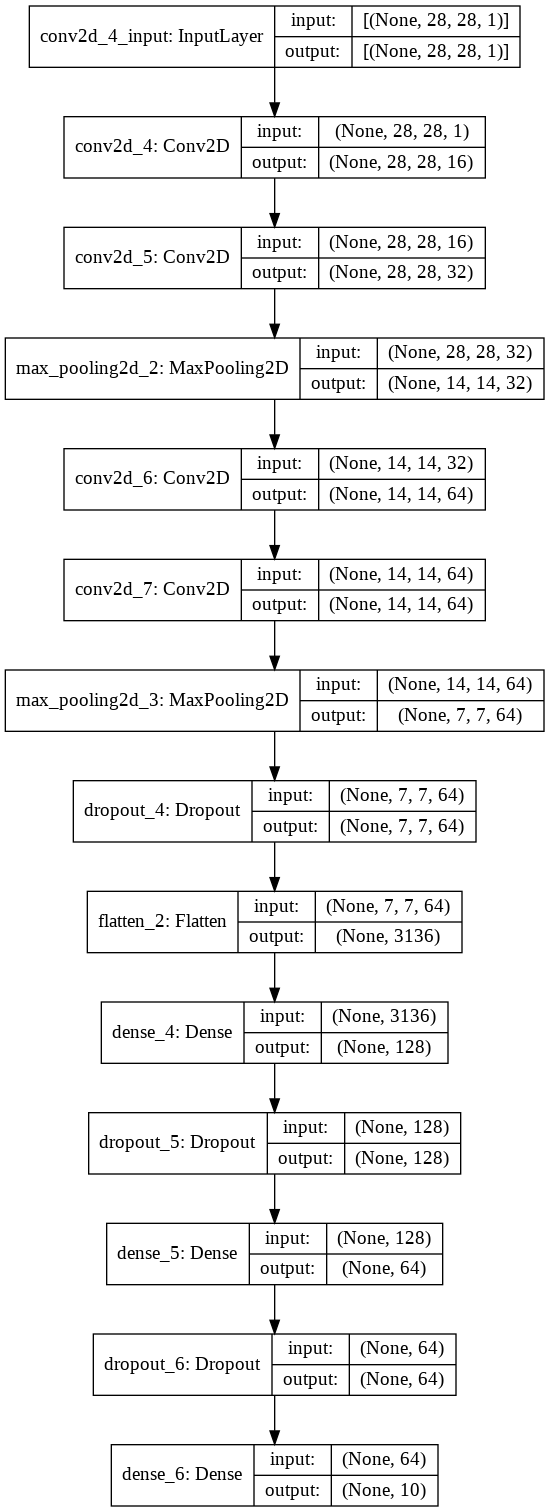

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7209 - accuracy: 0.7651 - val_loss: 0.0496 - val_accuracy: 0.9872
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1398 - accuracy: 0.9653 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0968 - accuracy: 0.9763 - val_loss: 0.0385 - val_accuracy: 0.9908
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0824 - accuracy: 0.9797 - val_loss: 0.0422 - val_accuracy: 0.9918
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0689 - accuracy: 0.9830 - val_loss: 0.0409 - val_accuracy: 0.9916

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9871 - val_loss: 0.0358 - val_accuracy: 0.9938
Epoch 7/10
1719/1719 [==============================] -

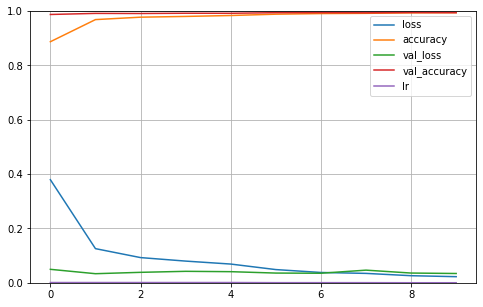

313/313 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9940
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



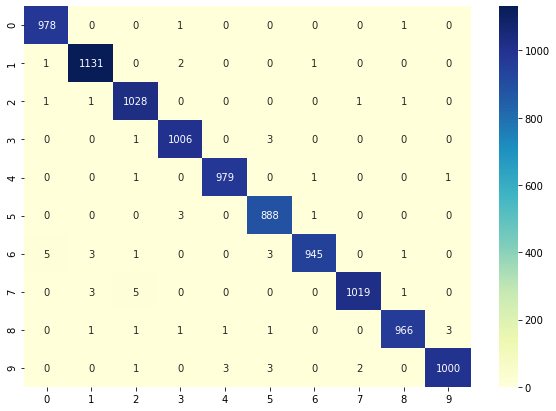

In [ ]:
params = {
  "conv_layers": 4,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "same",
  "filters1": 16,
  "filters2": 32,
  "filters3": 64,
  "filters4": 64
}

conv_classifier(params)

Experimento 3:

kernel: 3x3<br>
conv_layer1: filters=32<br>
conv_layer2: filters=64<br>
pooling_layer: poolsize=2<br>
conv_layer3: filters=128<br>
conv_layer4: filters=128<br>
dense_layer1: neurons=128<br>
dense_layer2: neurons=64<br>
out_layer: neurons=10

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 128)        

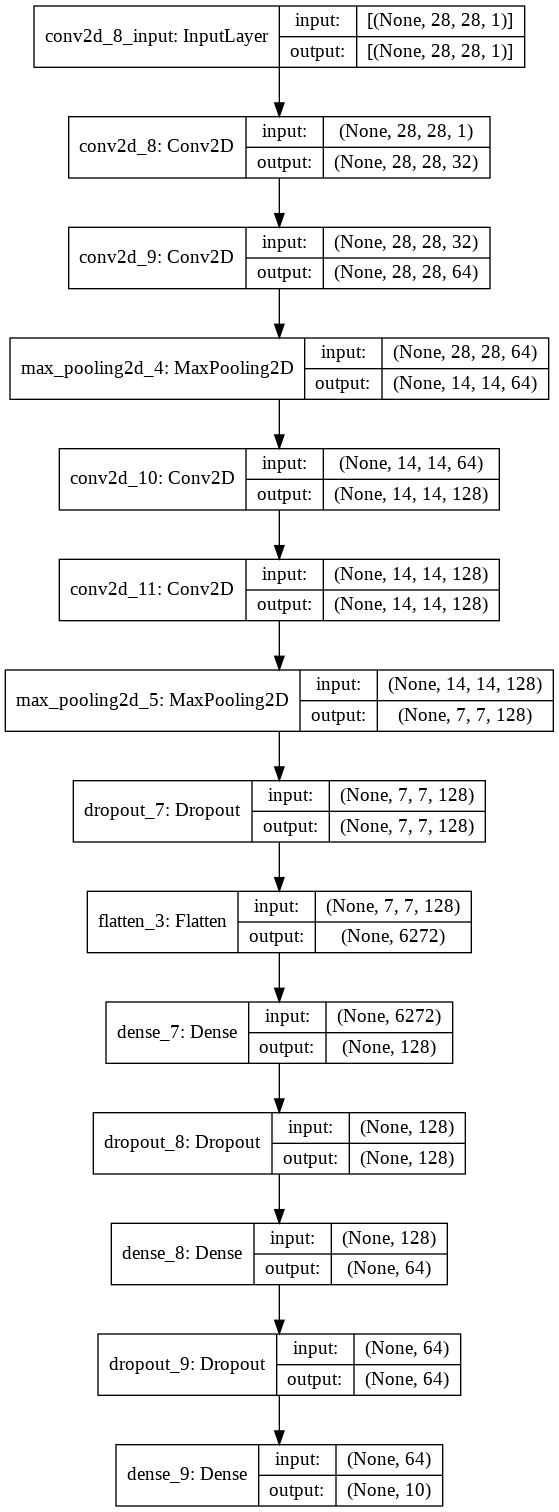

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6831 - accuracy: 0.7805 - val_loss: 0.0627 - val_accuracy: 0.9836
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1300 - accuracy: 0.9684 - val_loss: 0.0433 - val_accuracy: 0.9890
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0973 - accuracy: 0.9764 - val_loss: 0.0342 - val_accuracy: 0.9922
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0800 - accuracy: 0.9809 - val_loss: 0.0414 - val_accuracy: 0.9906
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0635 - accuracy: 0.9838 - val_loss: 0.0299 - val_accuracy: 0.9930
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0579 - accuracy: 0.9858 - val_loss: 0.0410 - val_accuracy: 0.9896
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0570 - accuracy: 0.9861 - val_loss: 0.0366 - val_ac

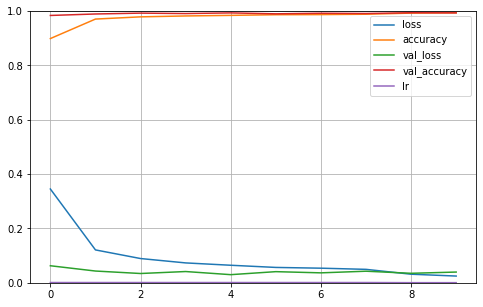

313/313 [==============================] - 1s 3ms/step - loss: 1252.7178 - accuracy: 0.9939
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



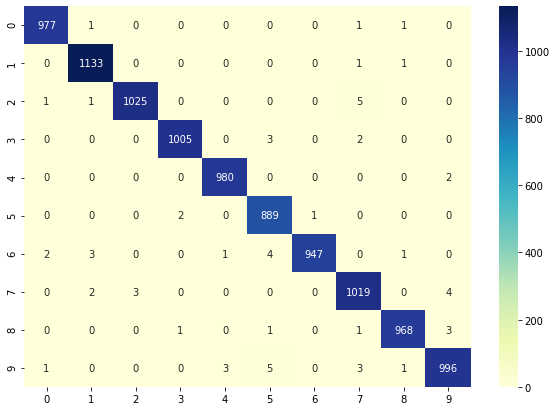

In [ ]:
params = {
  "conv_layers": 4,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "same",
  "filters1": 32,
  "filters2": 64,
  "filters3": 128,
  "filters4": 128
}

conv_classifier(params)

Experimento 4:


kernel: 3x3<br>
conv_layer1: filters=32<br>
conv_layer2: filters=64<br>
pooling_layer: poolsize=2<br>
conv_layer3: filters=128<br>
conv_layer4: filters=128<br>
pooling_layer: poolsize=2<br>
conv_layer3: filters=256<br>
conv_layer4: filters=256<br>
pooling_layer: poolsize=2<br>
dense_layer1: neurons=128<br>
dense_layer2: neurons=64<br>
out_layer: neurons=10

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)        

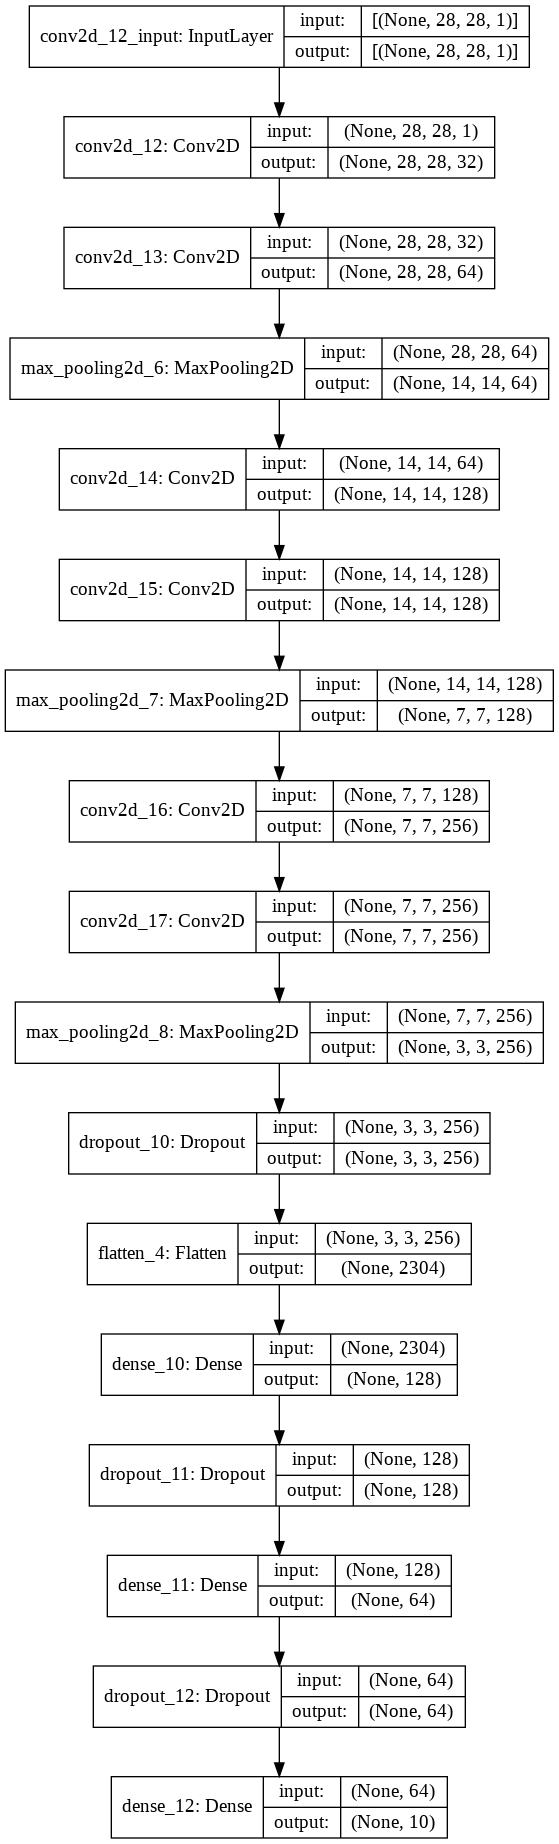

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8397 - accuracy: 0.7242 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1241 - accuracy: 0.9717 - val_loss: 0.0392 - val_accuracy: 0.9902
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0782 - accuracy: 0.9821 - val_loss: 0.0379 - val_accuracy: 0.9894
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0679 - accuracy: 0.9845 - val_loss: 0.0495 - val_accuracy: 0.9898
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0683 - accuracy: 0.9840 - val_loss: 0.0434 - val_accuracy: 0.9874
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0523 - accuracy: 0.9882 - val_loss: 0.0346 - val_accuracy: 0.9904
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0436 - accuracy: 0.9890 - val_loss: 0.0515 - val_ac

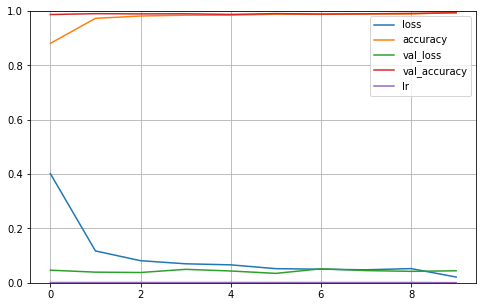

313/313 [==============================] - 1s 4ms/step - loss: 453.7179 - accuracy: 0.9928
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



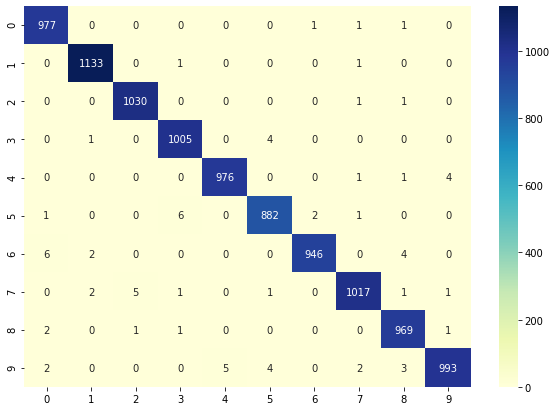

In [ ]:
params = {
  "conv_layers": 6,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "same",
  "filters1": 32,
  "filters2": 64,
  "filters3": 128,
  "filters4": 128,
  "filters5": 256,
  "filters6": 256
}

conv_classifier(params)

Experimento Extra: 0.1

kernel: 3x3<br>
stride: 3x3<br>
conv_layer1: filters=32<br>
conv_layer2: filters=32<br>
pooling_layer: poolsize=2<br>
dense_layer1: neurons=128<br>
out_layer: neurons=10

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 16)          160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________

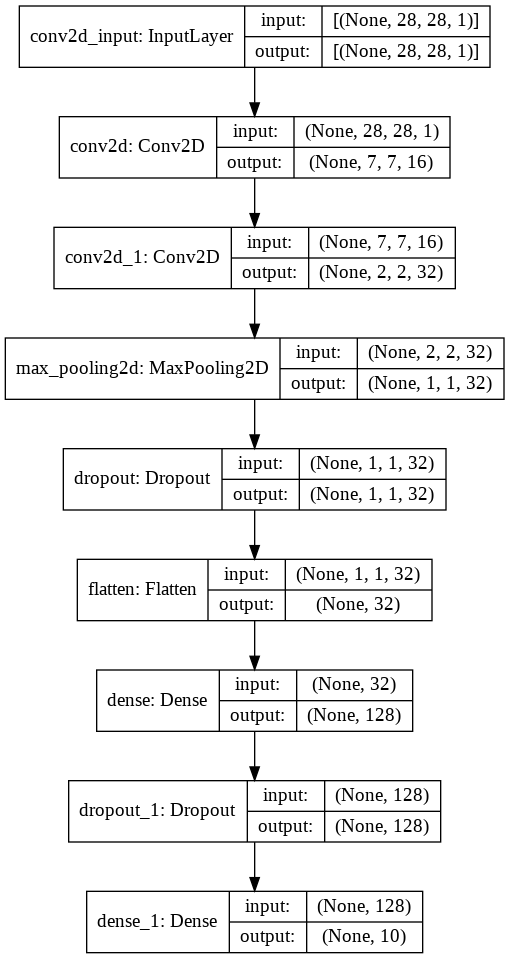

Epoch 1/10
1719/1719 [==============================] - 37s 4ms/step - loss: 1.4228 - accuracy: 0.5190 - val_loss: 0.4881 - val_accuracy: 0.8554
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7313 - accuracy: 0.7681 - val_loss: 0.3907 - val_accuracy: 0.8826
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7986 - val_loss: 0.3598 - val_accuracy: 0.9018
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5921 - accuracy: 0.8165 - val_loss: 0.3228 - val_accuracy: 0.9054
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5572 - accuracy: 0.8261 - val_loss: 0.3113 - val_accuracy: 0.9128
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5293 - accuracy: 0.8322 - val_loss: 0.3025 - val_accuracy: 0.9162
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5036 - accuracy: 0.8421 - val_loss: 0.2880 - val_accuracy

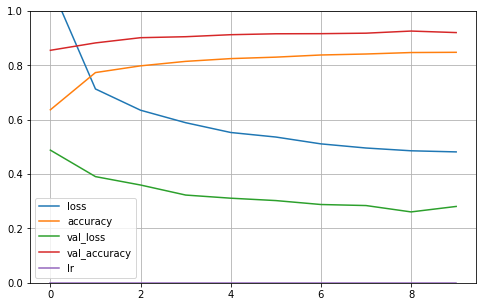

313/313 [==============================] - 1s 3ms/step - loss: 544.0076 - accuracy: 0.9100
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.97      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.90      0.93      0.92      1010
           4       0.95      0.88      0.91       982
           5       0.94      0.92      0.93       892
           6       0.94      0.96      0.95       958
           7       0.82      0.91      0.87      1028
           8       0.86      0.86      0.86       974
           9       0.86      0.77      0.81      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



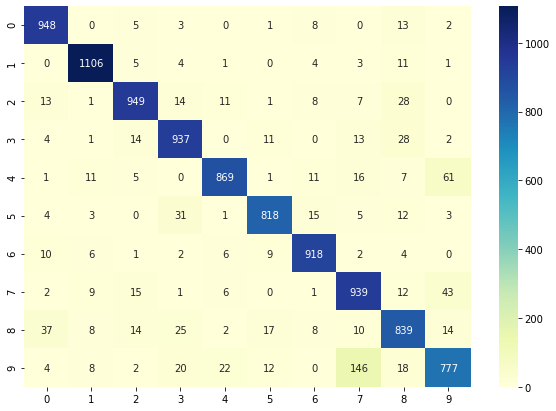

In [ ]:
params = {
  "conv_layers": 2,
  "kernel_size": 3,
  "strd": (4,4),
  "padding": "same",
  "filters1": 16,
  "filters2": 32
}

conv_classifier(params)

Experimento extra 3.1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

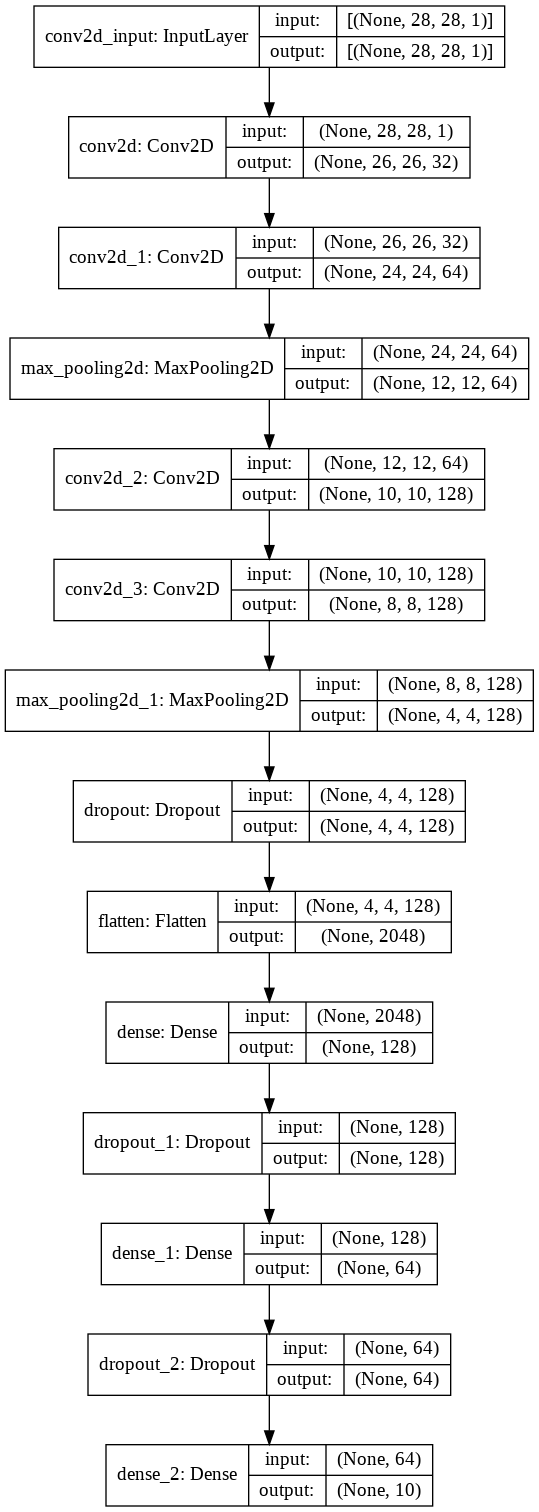

Epoch 1/10
1719/1719 [==============================] - 21s 11ms/step - loss: 0.7154 - accuracy: 0.7659 - val_loss: 0.0506 - val_accuracy: 0.9882
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1345 - accuracy: 0.9675 - val_loss: 0.0430 - val_accuracy: 0.9894
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0969 - accuracy: 0.9771 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0780 - accuracy: 0.9807 - val_loss: 0.0443 - val_accuracy: 0.9902
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0672 - accuracy: 0.9826 - val_loss: 0.0349 - val_accuracy: 0.9918
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0531 - accuracy: 0.9863 - val_loss: 0.0357 - val_accuracy: 0.9910
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0495 - accuracy: 0.9876 - val_loss: 0.0470 -

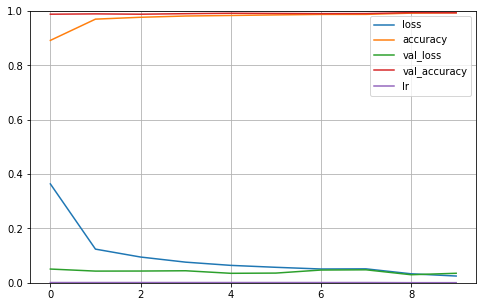

313/313 [==============================] - 1s 4ms/step - loss: 11.7902 - accuracy: 0.9933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



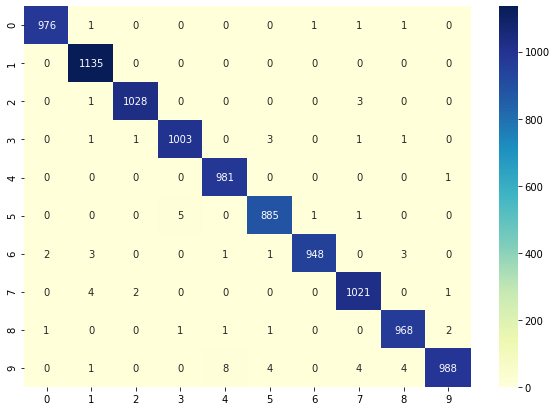

In [ ]:
params = {
  "conv_layers": 4,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "valid",
  "filters1": 32,
  "filters2": 64,
  "filters3": 128,
  "filters4": 128
}

conv_classifier(params)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)        

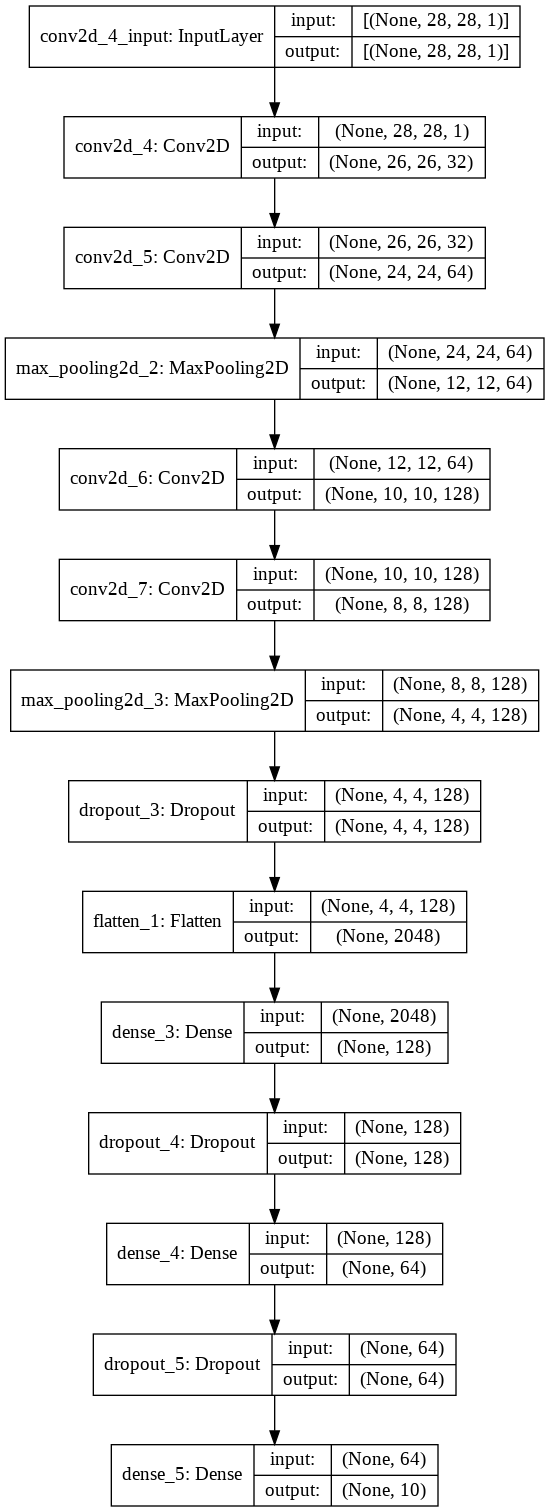

Epoch 1/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.7016 - accuracy: 0.7704 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 2/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1304 - accuracy: 0.9688 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 3/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0981 - accuracy: 0.9763 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 4/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0738 - accuracy: 0.9829 - val_loss: 0.0313 - val_accuracy: 0.9924
Epoch 5/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0651 - accuracy: 0.9842 - val_loss: 0.0318 - val_accuracy: 0.9928
Epoch 6/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0532 - accuracy: 0.9869 - val_loss: 0.0327 - val_accuracy: 0.9924
Epoch 7/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0496 - accuracy: 0.9879 - val_loss: 0.0362 -

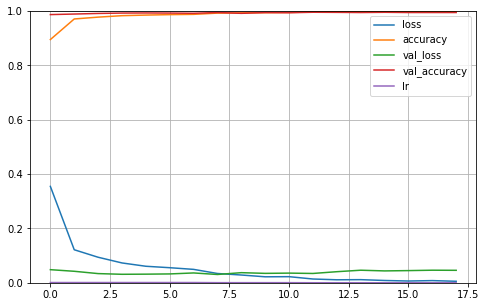

313/313 [==============================] - 1s 4ms/step - loss: 1207.2289 - accuracy: 0.9946
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



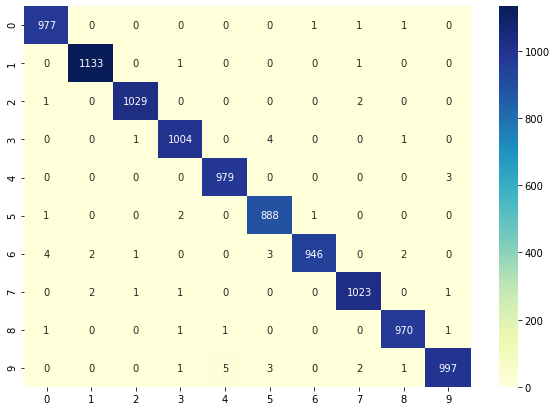

In [ ]:
params = {
  "epochs": 30,
  "conv_layers": 4,
  "kernel_size": 3,
  "strd": (1,1),
  "padding": "valid",
  "filters1": 32,
  "filters2": 64,
  "filters3": 128,
  "filters4": 128
}

conv_classifier(params)